In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from utilsTopology import *
from utilsBaricentricNeuralNetwork import *
fontsize=16

2025-03-12 18:52:19.390809: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741801939.408033    1878 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741801939.415931    1878 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-12 18:52:19.436753: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## CPLF example, generated by two points (simple continuous linear function).

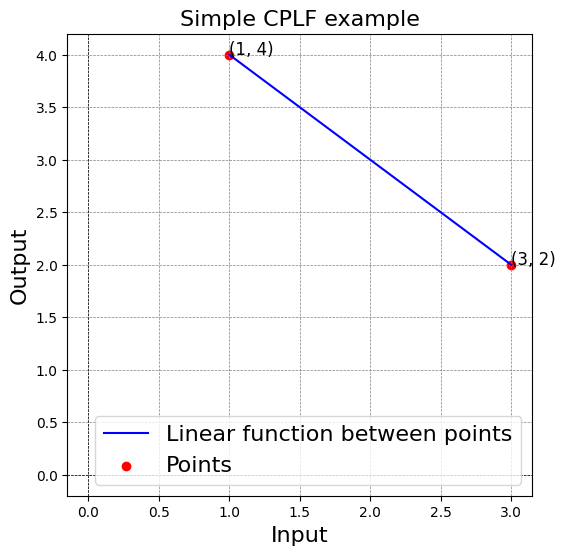

In [2]:
x1, y1 = 1, 4
x2, y2 = 3, 2

plt.figure(figsize=(6, 6))
plt.plot([x1, x2], [y1, y2], 'b-', label="Linear function between points")  
plt.scatter([x1, x2], [y1, y2], color='red', label="Points")    

plt.text(x1, y1, f"({x1}, {y1})", fontsize=12)
plt.text(x2, y2, f"({x2}, {y2})", fontsize=12)

plt.title("Simple CPLF example", fontsize=fontsize)
plt.xlabel("Input", fontsize=fontsize)
plt.ylabel("Output", fontsize=fontsize)
plt.axhline(0, color='black',linewidth=0.5, linestyle="--")  
plt.axvline(0, color='black',linewidth=0.5, linestyle="--")  
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend(loc="best", fontsize=fontsize)
plt.show()

## Linear function

$f(x) = m*x + n$, with m = 1 and n = 1, and with $x \in [1,3]$

2025-03-12 18:52:46.530544: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


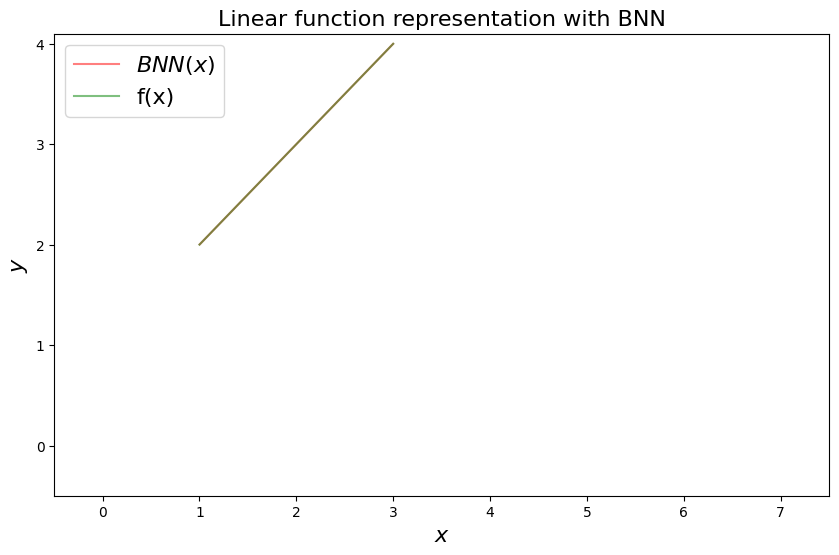

In [3]:
points = tf.constant([[1,2],[3,4]],dtype = tf.float32)
xs = [point[0] for point in points]
ys = [point[1] for point in points]
# Create the network
network = BaricentricNetworkTf(points)

x_values = tf.linspace(0, 7, 1000)  
outputs = network(x_values)
x_values, outputs
nan_tensor = tf.fill(tf.shape(outputs), float('nan'))
outputs = tf.where(outputs != 0, outputs, nan_tensor)

plt.figure(figsize=(10, 6))
plt.plot(x_values, outputs, 'r-', label='$BNN(x)$', alpha=0.5)
plt.plot(xs, ys, 'g-', label="f(x)", alpha=0.5)
plt.xlim((-0.5,7.5))
plt.ylim(bottom=-0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.xlabel('$x$', fontsize=fontsize)
plt.ylabel('$y$', fontsize=fontsize)
plt.title('Linear function representation with BNN', fontsize=fontsize)
plt.legend(loc="upper left", fontsize=fontsize)

plt.show()


## Decreasing linear function

$f(x) = m*x + n$, with m = -1 and n = 5, with $x \in [1,3]$

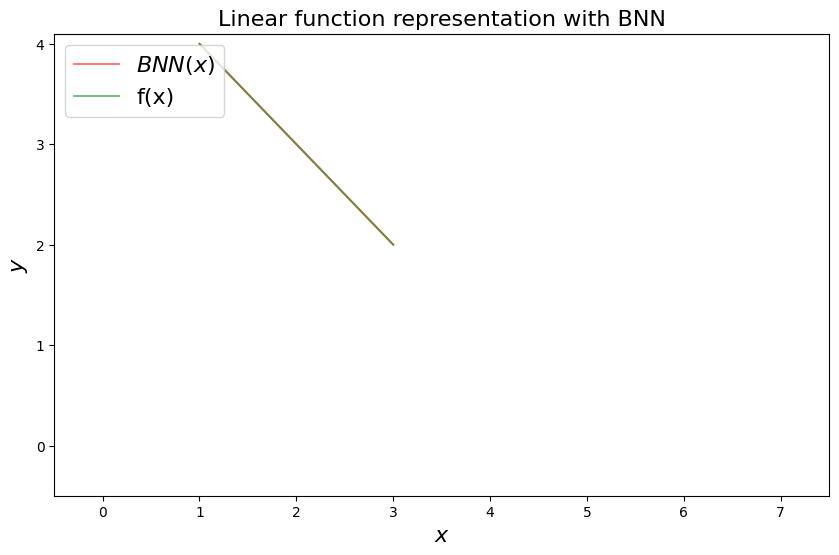

In [4]:
points = tf.constant([[1,4],[3,2]],dtype = tf.float32)
xs = [point[0] for point in points]
ys = [point[1] for point in points]
# Create the network
network = BaricentricNetworkTf(points)

x_values = np.linspace(0, 7, 1000)  # Valores de x desde 1 hasta 7
outputs = network(x_values)
x_values, outputs
nan_tensor = tf.fill(tf.shape(outputs), float('nan'))
outputs = tf.where(outputs != 0, outputs, nan_tensor)

plt.figure(figsize=(10, 6))
plt.plot(x_values, outputs, 'r-', label='$BNN(x)$', alpha=0.5)
plt.plot(xs, ys, 'g-', label="f(x)", alpha=0.5)
plt.xlim((-0.5,7.5))
plt.ylim(bottom=-0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.xlabel('$x$', fontsize=fontsize)
plt.ylabel('$y$', fontsize=fontsize)
plt.title('Linear function representation with BNN', fontsize=fontsize)
plt.legend(loc="upper left", fontsize=fontsize)

plt.show()


### CPLF function formed by two increasing linear functions

$f_1(x) = m_1*x + n_1$, with m = 1 and n = 1, in $x \in [1,3]$

$f_2(x) = m_2*x + n_2$, with m = 2 and n = -2, in $x \in [3,5]$

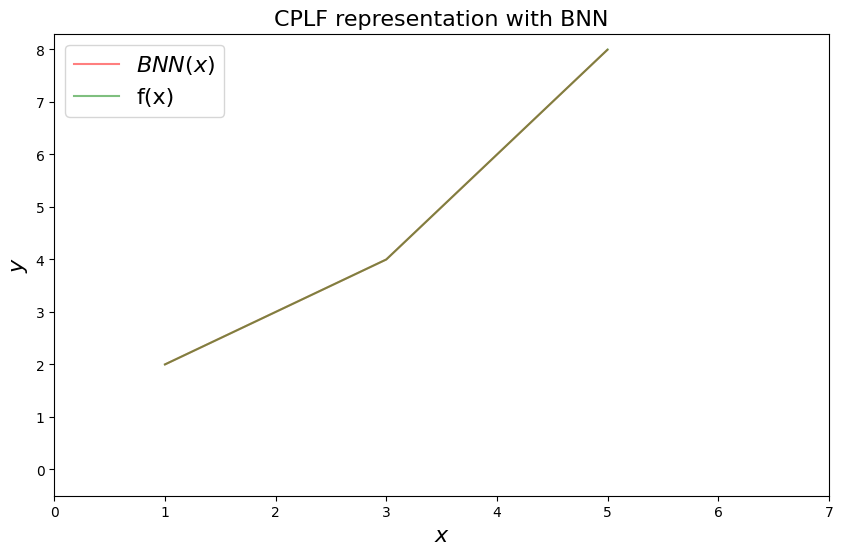

In [5]:
points = tf.constant([[1,2],[3,4],[5,8]],dtype = tf.float32)
xs = [point[0] for point in points]
ys = [point[1] for point in points]
# Create the network
network = BaricentricNetworkTf(points)

x_values = np.linspace(0, 7, 1000)  # Valores de x desde 1 hasta 7
outputs = network(x_values)
x_values, outputs
nan_tensor = tf.fill(tf.shape(outputs), float('nan'))
outputs = tf.where(outputs != 0, outputs, nan_tensor)

plt.figure(figsize=(10, 6))
plt.plot(x_values, outputs, 'r-', label='$BNN(x)$', alpha=0.5)
plt.plot(xs, ys, 'g-', label="f(x)", alpha=0.5)
plt.xlim((0,7))
plt.ylim(bottom=-0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.xlabel('$x$', fontsize=fontsize)
plt.ylabel('$y$', fontsize=fontsize)
plt.title('CPLF representation with BNN', fontsize=fontsize)
plt.legend(loc="upper left", fontsize=fontsize)
plt.savefig('figures/BNNRepresentationCPLFExample1Tf.png', dpi=300, bbox_inches='tight')
plt.show()

### CPLF function formed by a decreasing and an increasing function, in that order.
$f_1(x) = m_1*x + n_1$, with m = -1 and n = 5, in $x [1,3]$

$f_2(x) = m_2*x + n_2$, with m = 2 and n = -4, in $x \in [3,5]$

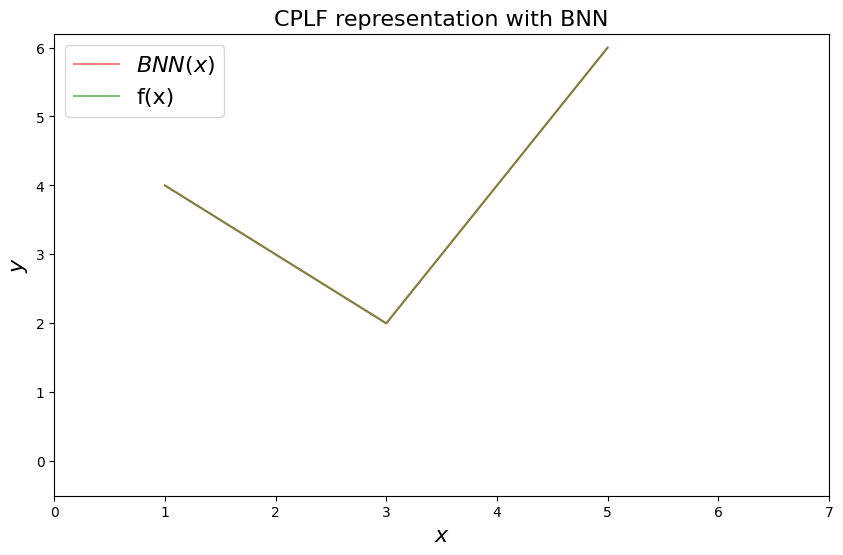

In [6]:
points = tf.constant([[1,4],[3,2],[5,6]],dtype = tf.float32)
xs = [point[0] for point in points]
ys = [point[1] for point in points]
# Create the network
network = BaricentricNetworkTf(points)

x_values = np.linspace(0, 7, 1000)  # Valores de x desde 1 hasta 7
outputs = network(x_values)
x_values, outputs
nan_tensor = tf.fill(tf.shape(outputs), float('nan'))
outputs = tf.where(outputs != 0, outputs, nan_tensor)

plt.figure(figsize=(10, 6))
plt.plot(x_values, outputs, 'r-', label='$BNN(x)$', alpha=0.5)
plt.plot(xs, ys, 'g-', label="f(x)", alpha=0.5)
plt.xlim((0,7))
plt.ylim(bottom=-0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.xlabel('$x$', fontsize=fontsize)
plt.ylabel('$y$', fontsize=fontsize)
plt.title('CPLF representation with BNN', fontsize=fontsize)
plt.legend(loc="upper left", fontsize=fontsize)
plt.savefig('figures/BNNRepresentationCPLFExample2Tf.png', dpi=300, bbox_inches='tight')
plt.show()

## CPLF

If we have a continuous piecewise linear function, we can represent it by tis barycentric neural network:

### Example 1
$
$f(x)$ = \begin{cases} 
    x + 2 & \text{if } x \in [-10,0)\\
    -x + 2 & \text{if } x \in [0, 2)\\
    x - 2 & \text{if } x \in [2,10)
\end{cases}
$

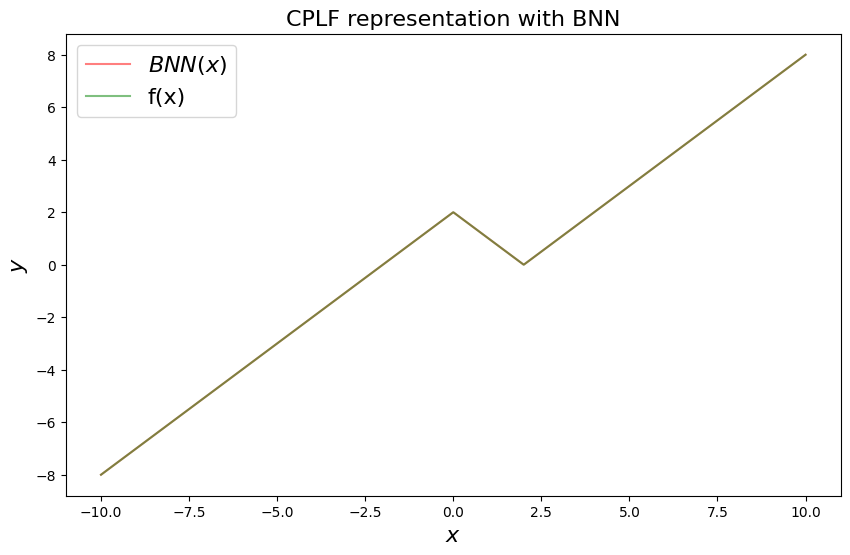

In [7]:
points = tf.constant([[-10,-8],[0,2],[2,0],[10,8]],dtype = tf.float32)
xs = [point[0] for point in points]
ys = [point[1] for point in points]
# Create the network
network = BaricentricNetworkTf(points)

x_values = np.linspace(-10, 10, 1000)  # Valores de x desde 1 hasta 7
outputs = network(x_values)
x_values, outputs
nan_tensor = tf.fill(tf.shape(outputs), float('nan'))
outputs = tf.where(outputs != 0, outputs, nan_tensor)

plt.figure(figsize=(10, 6))
plt.plot(x_values, outputs, 'r-', label='$BNN(x)$', alpha=0.5)
plt.plot(xs, ys, 'g-', label="f(x)", alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.xlabel('$x$', fontsize=fontsize)
plt.ylabel('$y$', fontsize=fontsize)
plt.title('CPLF representation with BNN', fontsize=fontsize)
plt.legend(loc="upper left", fontsize=fontsize)
plt.savefig('figures/BNNRepresentationCPLFExample3Tf.png', dpi=300, bbox_inches='tight')
plt.show()

### Example 2

$
$f(x)$=
\begin{cases} 
    3x + 1 & \text{si } x \in [-10, 0) \\
    -4x + 1 & \text{si } x \in [0, 1) \\
    x - 4 & \text{si } x \in [1, 4) \\
    -0.5x + 2 & \text{si } x \in [4,10) 
\end{cases}
$

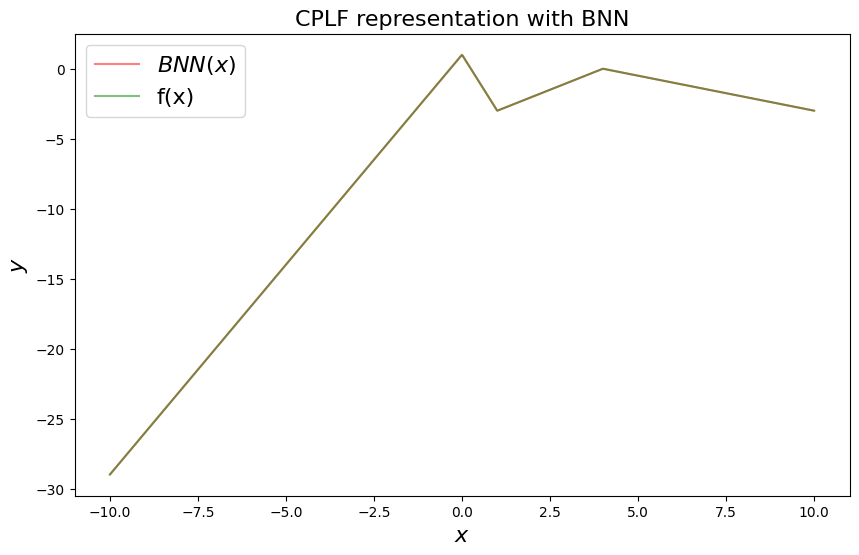

In [8]:
points = tf.constant([[-10,-29],[0,1],[1,-3],[4,0],[10,-3]],dtype = tf.float32)
xs = [point[0] for point in points]
ys = [point[1] for point in points]
# Create the network
network = BaricentricNetworkTf(points)

x_values = np.linspace(-15, 15, 1000)  # Valores de x desde 1 hasta 7
outputs = network(x_values)
x_values, outputs
nan_tensor = tf.fill(tf.shape(outputs), float('nan'))
outputs = tf.where(outputs != 0, outputs, nan_tensor)

plt.figure(figsize=(10, 6))
plt.plot(x_values, outputs, 'r-', label='$BNN(x)$', alpha=0.5)
plt.plot(xs, ys, 'g-', label="f(x)", alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.xlabel('$x$', fontsize=fontsize)
plt.ylabel('$y$', fontsize=fontsize)
plt.title('CPLF representation with BNN', fontsize=fontsize)
plt.legend(loc="upper left", fontsize=fontsize)
plt.savefig('figures/BNNRepresentationCPLFExample4Tf.png', dpi=300, bbox_inches='tight')
plt.show()

## Example 3

Any points directly form a CPLF, it is simpler that way.

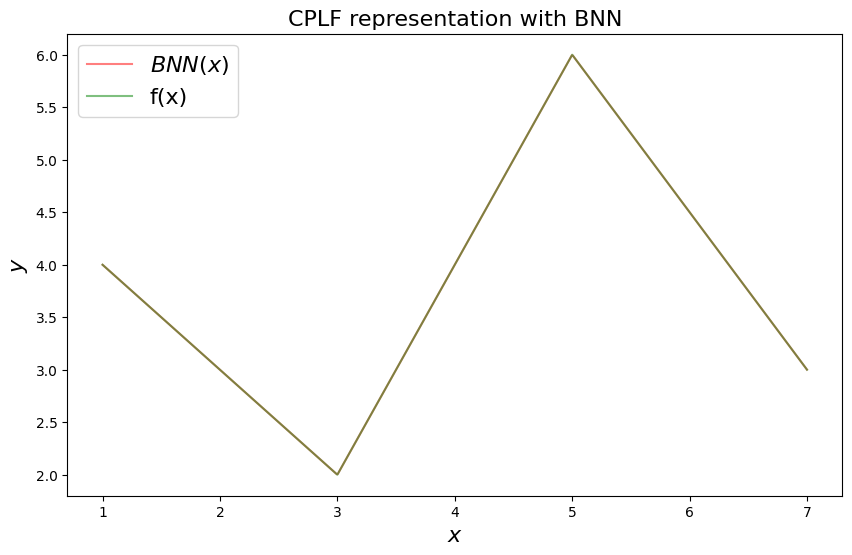

In [9]:
# Definir una lista de puntos [(x1, y1), (x2, y2), ..., (xn, yn)]
points = tf.constant([[1,4],[3,2],[5,6],[7,3]],dtype = tf.float32)
xs = [point[0] for point in points]
ys = [point[1] for point in points]
# Create the network
network = BaricentricNetworkTf(points)

x_values = np.linspace(0, 8, 1000)  # Valores de x desde 1 hasta 7
outputs = network(x_values)
x_values, outputs
nan_tensor = tf.fill(tf.shape(outputs), float('nan'))
outputs = tf.where(outputs != 0, outputs, nan_tensor)

plt.figure(figsize=(10, 6))
plt.plot(x_values, outputs, 'r-', label='$BNN(x)$', alpha=0.5)
plt.plot(xs, ys, 'g-', label="f(x)", alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.xlabel('$x$', fontsize=fontsize)
plt.ylabel('$y$', fontsize=fontsize)
plt.title('CPLF representation with BNN', fontsize=fontsize)
plt.legend(loc="upper left", fontsize=fontsize)
plt.savefig('figures/BNNRepresentationCPLFExample5Tf.png', dpi=300, bbox_inches='tight')
plt.show()